In [1]:
import ugradio
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


##  Statistical Error Analysis

#### Sampled M cycles of the standing wave in the slotted line. you can calculate the wavelength from the distance between a single null pair. While this calculation is a good estimate, each of your measurements has an error. You have measured the distance between M-1 null pairs.

In [2]:
def findDiff (inArray):
    Diff = []
    
    for i in range (len(inArray)-1):
        Diff.append(inArray[i+1]-inArray[i])
    
    return Diff

def ave(inArray):
    return float(sum(inArray)/len(inArray))


#### coax slotted line at C-band

In [3]:
#frequency = 3 GHz 
#open ended slotted coaxial line with the HP83712B synthesizer
opLow = [2.6,6.4,10.3,14.2,18.0,21.5,25.2,29.2,32.9,36.4, 39.9,43.9,48.1]
opLowDiff = findDiff(opLow)

#frequency = 3 GHz 
#closed ended slotted coaxial line
clLow = [4.1,8.0,11.4,15.4,19.1,22.8,26.3,30.4,34.2,37.7,41.4,45.1,49.1]
clLowDiff = findDiff(clLow)


#### the X-band waveguide

In [5]:
#frequency = 8 GHz 
#open ended slotted coaxial line
opHigh = [8.3,10.1,12.2,13.5,15.1,17.1]
opHighDiff = findDiff(opHigh)

#frequency = 7.3 GHz 
#close ended slotted coaxial line
clHigh = [10.6,12.1,15.4,17.7]
clHighDiff = findDiff(clHigh)

#frequency = 7.5 GHz 
#close ended slotted coaxial line
clHigh1 = [9.1,11.2,13.2,15.6,17.5]
clHigh1Diff = findDiff(clHigh1)

#frequency = 7.7 GHz 
#close ended slotted coaxial line
clHigh2 = [9.9,11.6,13.6,15.3,17.9]
clHigh2Diff = findDiff(clHigh2)

#frequency = 8 GHz 
#close ended slotted coaxial line
clHigh3 = [10.1,11.2,12.9,14.5,16.2,17.9]
clHigh3Diff = findDiff(clHigh3)

#frequency = 8.5 GHz 
#close ended slotted coaxial line
clHigh4 = [9.3,10.8,12.0,13.6,15.1,16.2,17.7]
clHigh4Diff = findDiff(clHigh4)

#frequency = 8.8 GHz 
#close ended slotted coaxial line
clHigh5 = [8.4,9.8,11.0,12.1,13.4,14.6,16.4]
clHigh5Diff = findDiff(clHigh5)

#### Two methods to combine these measurement to obtain the most accurate wavelenth


#### 1) Take average of the M-1 pairs . The uncertainly is sigma/sqrt(M-1) 

In [18]:
def usualRule (inArray):
    
    wLen = ave(inArray) 
    error = (max(inArray)-min(inArray))/(2*np.sqrt(len(inArray)-1))
    
    return wLen,error


0.7


In [14]:
#print(usualRule(opLowDiff))
print("For open ended coax slotted line")
print("The average wavelength is measured to be {} with uncertainty of {}".format(usualRule(opLowDiff)[0],usualRule(opLowDiff)[1]))

print("For close ended coax slotted line")
print("The average wavelength is measured to be {} with uncertainty of {}".format(usualRule(clLowDiff)[0],usualRule(clLowDiff)[1]))

For open ended coax slotted line
The average wavelength is measured to be 3.79166666667 with uncertainty of 0.105528970602
For close ended coax slotted line
The average wavelength is measured to be 3.75 with uncertainty of 0.105528970602


#### 2)  using np.polyfit

In [8]:
x = np.linspace(0, len(opLow)-1, len(opLow))
print(len(x))
print(opLow)

13
[2.6, 6.4, 10.3, 14.2, 18.0, 21.5, 25.2, 29.2, 32.9, 36.4, 39.9, 43.9, 48.1]


<IPython.core.display.Javascript object>


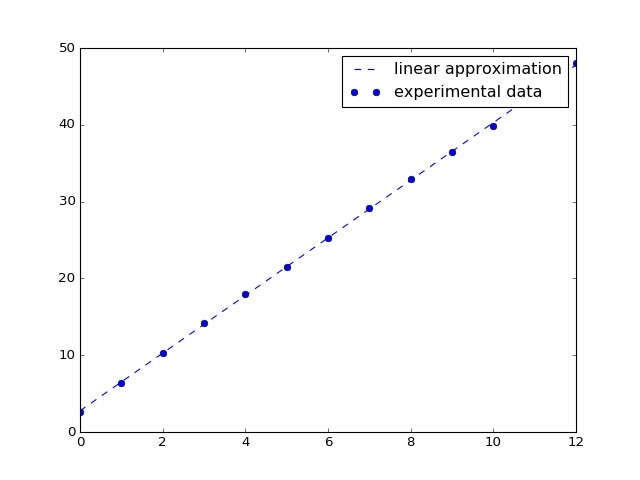

[ 3.75274725  2.76043956]


In [26]:
x = np.linspace(0, len(opLow)-1, len(opLow))
y = opLow

p = np.polyfit(x,y,1);

y1 = opLow
f1 = np.polyval(p,x);

plt.plot(x,f1,'b--')
plt.plot(x,y,'o')
plt.legend({'experimental data','linear approximation'})
plt.show()

print(p) # first argument is half wavelength, the second argument is the offset

<IPython.core.display.Javascript object>


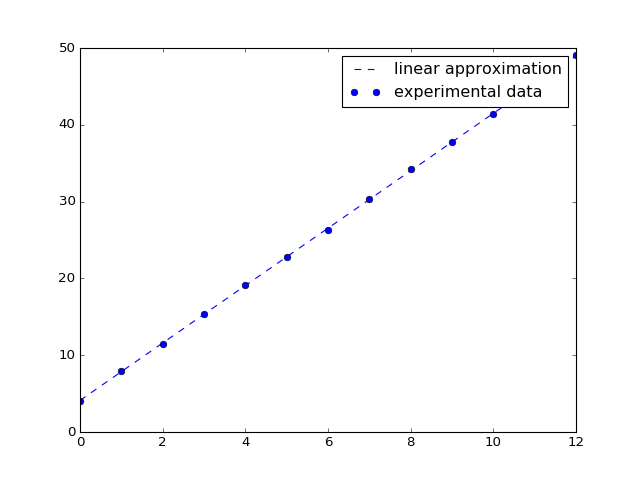

[ 3.73736264  4.11428571]


In [27]:
x = np.linspace(0, len(clLow)-1, len(clLow))
y = clLow

p = np.polyfit(x,y,1);

y1 = clLow
f1 = np.polyval(p,x);

plt.plot(x,f1,'b--')
plt.plot(x,y,'o')
plt.legend({'experimental data','linear approximation'})
plt.show()

print(p) # first argument is half wavelength, the second argument is the offset

#### The X-band waveguide

##### Do a least-squares fit of equation 6 to solve for the waveguide width a. The easiest way to handle this problem is by the brute force method which we will discuss in class (???)